# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Davano Al Raffi Abdul Jabbar]
- **Email:** [m180d4ky2427@bangkit.academy]
- **ID Dicoding:** [m180d4ky2427]

## Menentukan Pertanyaan Bisnis

- Berapa jumlah total sewa sepeda (cnt) untuk tahun 2012 selama musim gugur (musim 3)?
- Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?
- Bagaimana musim memengaruhi jumlah peminjaman sepeda?
- Bagaimana perbandingan dari pengguna kasual dan pengguna yang terdaftar?
- Bagaimana performa peminjaman sepeda tiap bulan?


## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Kode ini mengimpor beberapa library yang sering digunakan untuk analisis data.
Library tersebut menyediakan fungsi untuk:
Membaca, memanipulasi, dan menganalisis data (pandas)
Melakukan perhitungan numerik dan manipulasi array (numpy)
Membuat visualisasi data seperti plot, grafik, dan histogram (matplotlib)
Membuat visualisasi statistik menarik (seaborn)
Membuat visualisasi interaktif data (plotly)
Kode ini juga mengatur gaya default untuk plot seaborn dan menekan warning terkait perubahan Python masa depan.
Singkatnya, kode ini menyiapkan environment untuk analisis data dengan berbagai fungsi dan pengaturan.

## Data Wrangling

### Gathering Data

In [ ]:
raw_df = pd.read_csv("data/day.csv")
raw_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
kita membuat sebuah dataframe untuk membaca data tersebut menggunakan nama variabel raw_df yang berisi dataframe yang akan kita analisis

### Assessing Data

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kode ini dilakukan untuk memastikan tidak terdapat data yang memiliki missing value, dan terlihat tidak ada yang memiliki missing value.

### Cleaning Data

In [ ]:
raw_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", raw_df.duplicated().sum())

Jumlah duplikasi:  0


Kode ini untuk melihat apakah terdapat data duplikat, dan terlihat tidak ada satupun duplikat.

In [ ]:
raw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kode ini untuk melihat lebih jelas karakteristik dari masing-masing variabel.

In [ ]:
df_time = raw_df.copy()
df_time['dteday'] = pd.to_datetime(df_time['dteday'])
df_time['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


kodeini digunakan untuk membuat salinan dari DataFrame raw_df dengan nama df_time, mengubah kolom dteday menjadi format datetime, menampilkan informasi tentang kolom dteday, termasuk tipe data, jumlah data non-null, dan statistik deskriptif.

Singkatnya, kode ini mengubah kolom dteday menjadi format datetime dan menampilkan informasi detailnya.

## Exploratory Data Analysis (EDA)

### Explore 1

In [ ]:
warnings.filterwarnings("ignore")

# df_day
correlation_matrix = raw_df.corr()
fig = px.imshow(correlation_matrix)
fig.update_layout(title="Korelasi antara Variabel Numerik")
fig.show()

Deskripsi:

- correlation_matrix = raw_df.corr(): Menghitung matriks korelasi untuk semua kolom numerik dalam DataFrame raw_df.
- fig = px.imshow(correlation_matrix): Membuat heatmap interaktif dari matriks korelasi menggunakan Plotly Express.
- fig.update_layout(title="Korelasi antara Variabel Numerik"): Menambahkan judul untuk heatmap.
- fig.show(): Menampilkan heatmap.

Singkatnya, kode ini menghitung dan memvisualisasikan matriks korelasi untuk menunjukkan hubungan antara variabel numerik dalam dataset.

### Explore 2

In [ ]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_cols:
    fig = px.histogram(raw_df, x=col, title=f'Distribusi {col}')
    fig.show()

Kode ini akan membuat dan menampilkan histogram untuk setiap kolom numerik dalam dataframe raw_df

- numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']: Baris ini mendefinisikan daftar bernama numeric_cols yang berisi nama-nama kolom numerik yang ingin Anda analisis.

- for col in numeric_cols:: Baris ini memulai loop yang berulang untuk setiap nama kolom dalam daftar numeric_cols.

- fig = px.histogram(raw_df, x=col, title=f'Distribusi {col}'): Di dalam loop, baris ini membuat histogram menggunakan fungsi px.histogram dari Plotly Express.

- raw_df: Ini merujuk ke DataFrame yang berisi data.
x=col: Ini menentukan nama kolom dari daftar numeric_cols sebagai variabel sumbu x untuk histogram.

- title=f'Distribusi {col}': Ini membuat judul untuk histogram menggunakan f-string, yang secara dinamis memasukkan nama kolom saat ini (col) ke dalam judul.
fig.show(): Baris ini menampilkan histogram yang dibuat di layar.

### Explore 3

In [ ]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    fig = px.bar(raw_df[col].value_counts().reset_index(), x='index', y=col)
    fig.update_layout(title=f'Distribusi {col}')
    fig.show()

Kode tersebut berulang untuk setiap kolom kategorikal (categorical_cols) dan melakukan visualisasi berupa bar chart:

- for col in categorical_cols:: Looping untuk setiap nama kolom dalam daftar categorical_cols.

- raw_df[col].value_counts().reset_index():
raw_df[col]: Mengambil data dari kolom col pada DataFrame raw_df.

- .value_counts(): Menghitung jumlah kemunculan unik dari setiap nilai dalam kolom tersebut.

- .reset_index(): Mengubah hasil perhitungan menjadi DataFrame dengan kolom "index" (nilai unik) dan kolom col (jumlah kemunculan).

- fig = px.bar(...): Membuat bar chart menggunakan Plotly Express.

- x='index': Sumbu X menggunakan kolom "index" yang berisi nilai unik kategori.

- y=col: Sumbu Y menggunakan kolom col yang berisi jumlah kemunculan setiap kategori.

- fig.update_layout(title=f'Distribusi {col}'): Menambahkan judul dinamis "Distribusi {col}" ke bar chart.

- fig.show(): Menampilkan bar chart yang telah dibuat.

### Explore 4

In [ ]:
fig = px.box(raw_df, x='season', y='cnt')
fig.update_layout(title='Hubungan antara Musim dan Jumlah Sewa')
fig.show()

Kode ini menghasilkan boxplot yang menunjukkan hubungan antara musim dan jumlah sewa. Boxplot menunjukkan median, kuartil pertama dan ketiga, serta outlier untuk setiap musim. Visualisasi ini membantu memahami bagaimana musim memengaruhi jumlah sewa dan mengidentifikasi musim dengan jumlah sewa yang tinggi atau rendah.

### Explore 5

In [ ]:
fig = px.box(raw_df, x='holiday', y='cnt')
fig.update_layout(title='Hubungan antara Hari Libur dan Jumlah Sewa')
fig.show()

Kode ini menghasilkan boxplot yang menunjukkan hubungan antara hari libur dan jumlah sewa. Boxplot menunjukkan median, kuartil pertama dan ketiga, serta outlier untuk setiap kategori hari libur. Visualisasi ini membantu memahami bagaimana hari libur memengaruhi jumlah sewa dan mengidentifikasi kategori hari libur dengan jumlah sewa yang tinggi atau rendah.

### Explore 6

In [ ]:
fig = px.box(raw_df, x='weathersit', y='cnt')
fig.update_layout(title='Hubungan antara Cuaca dan Jumlah Sewa')
fig.show()

Kode ini menghasilkan boxplot yang menunjukkan hubungan antara cuaca dan jumlah sewa. Boxplot menunjukkan median, kuartil pertama dan ketiga, serta outlier untuk setiap kategori cuaca. Visualisasi ini membantu memahami bagaimana cuaca memengaruhi jumlah sewa dan mengidentifikasi kategori cuaca dengan jumlah sewa yang tinggi atau rendah.

### Explore 7

In [ ]:
fig = px.box(raw_df, x='weathersit', y='cnt')
fig.update_layout(title='Hubungan antara Cuaca dan Jumlah Sewa')
fig.show()

Kode ini menghasilkan boxplot yang menunjukkan hubungan antara cuaca dan jumlah sewa. Boxplot ini menunjukkan median, kuartil pertama dan ketiga, serta outlier untuk setiap kategori cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda ?


Text(0.5, 1.0, 'Humidity vs Count')

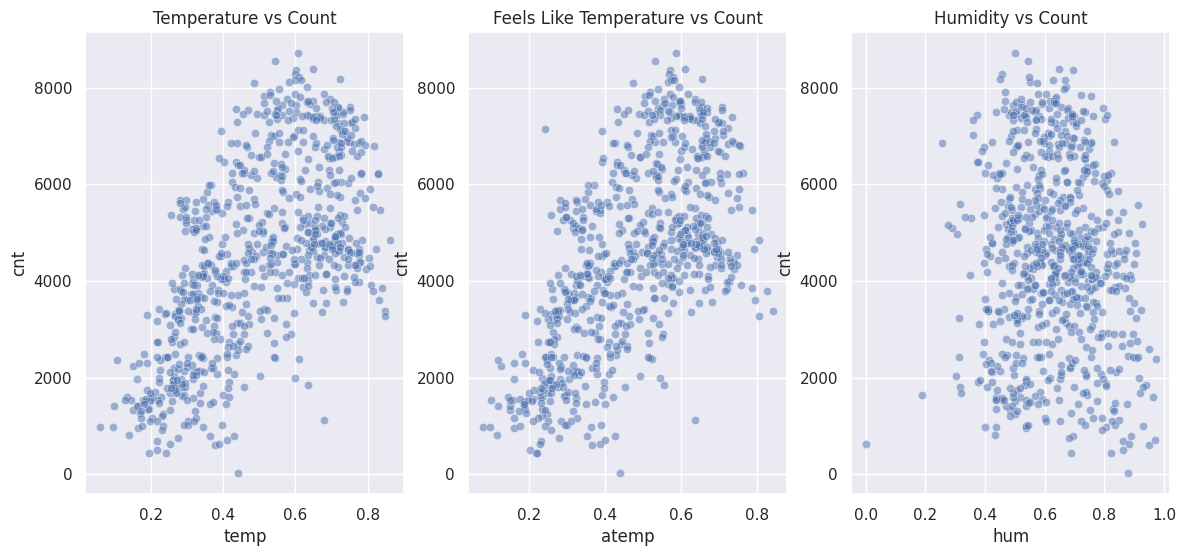

In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='cnt',
    data=raw_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='cnt',
    data=raw_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='cnt',
    data=raw_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

Berdasarkan hasil analisis diatas menggunakan scatter plot, dapat kita tarik pernyataan sebagai berikut:

- Hubungan antara temp dan count ternyata menunjukan korelasi yang positif diantara dua variabel.
- Hubungan antara atemp dan count ternyata juga menunjukan korelasi yang positif diantara dua variabel.
- Hubungan antara hum dan count ternyata menunjukan korelasi yang sedikit negatif, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu nampak.

Kesimpulannya jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Dan pengaruh dari humidity sepertinya sangat kecil disini, walaupun cenderung dapat menurunkan jumlah pengguna sepeda.

### Pertanyaan 2 : Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?



In [ ]:
# Filter tahun 2011, musim panas (season 2), dan hari libur (holiday = 1)
filtered_data1 = raw_df[(raw_df["workingday"] == 0)]
filtered_data2 = raw_df[(raw_df["workingday"] == 1)]

# Hitung jumlah total sepeda sewaan
total_sepeda_sewaan1 = filtered_data1["cnt"].sum()
total_sepeda_sewaan2 = filtered_data2["cnt"].sum()

print("Jumlah total sepeda sewaan yang digunakan pada hari kerja :", total_sepeda_sewaan1)
print("Jumlah total sepeda sewaan yang digunakan pada hari libur :", total_sepeda_sewaan2)

Jumlah total sepeda sewaan yang digunakan pada hari kerja : 1000269
Jumlah total sepeda sewaan yang digunakan pada hari libur : 2292410


Kode Deskripsi :

1. Filter data:
raw_df[(raw_df["workingday"] == 0)]:
Mengambil data dari DataFrame raw_df.
Memfilter data berdasarkan kondisi:
raw_df["workingday"] == 0: Menentukan hari kerja (workingday).
raw_df[(raw_df["workingday"] == 1)]:
Mengambil data dari DataFrame raw_df.
Memfilter data berdasarkan kondisi:
raw_df["workingday"] == 1: Menentukan hari libur (holiday).

2. Hitung total sewa:
filtered_data1["cnt"].sum(): Menghitung total jumlah sepeda sewaan pada hari kerja dari DataFrame filtered_data1.
filtered_data2["cnt"].sum(): Menghitung total jumlah sepeda sewaan pada hari libur dari DataFrame filtered_data2.

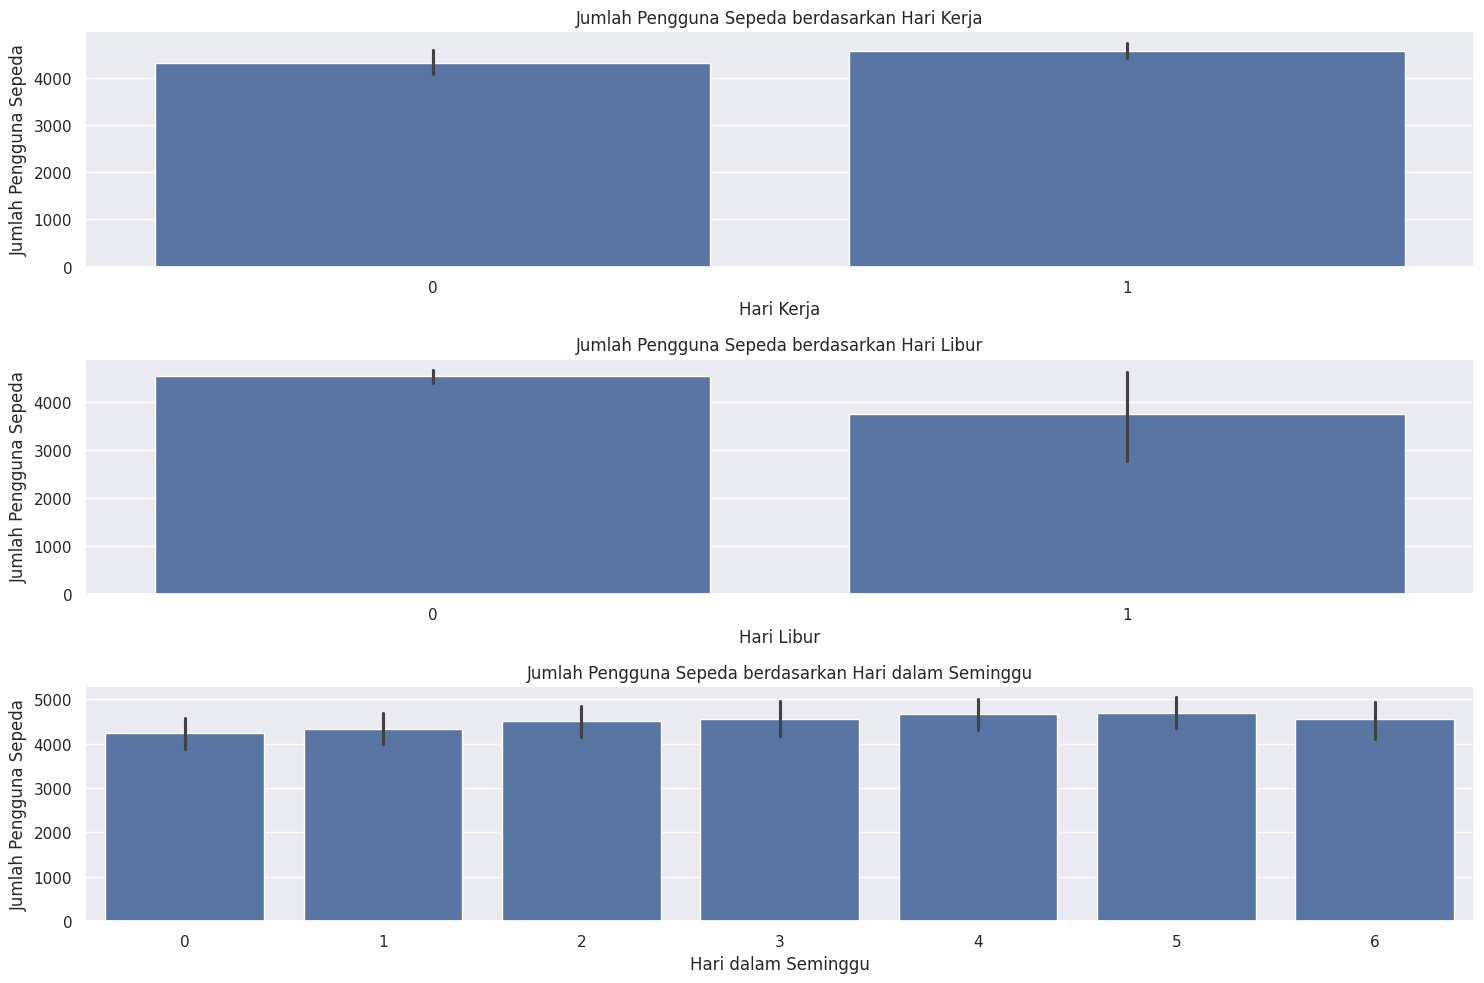

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='cnt',
    data=raw_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='cnt',
  data=raw_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='cnt',
  data=raw_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Kode ini menghasilkan boxplot yang menunjukkan perbedaan antara jumlah pengguna pada hari kerja dan hari libur dalam jumlah sewa sepeda harian.

### Pertanyaan 3 : Bagaimana musim memengaruhi jumlah peminjaman sepeda?


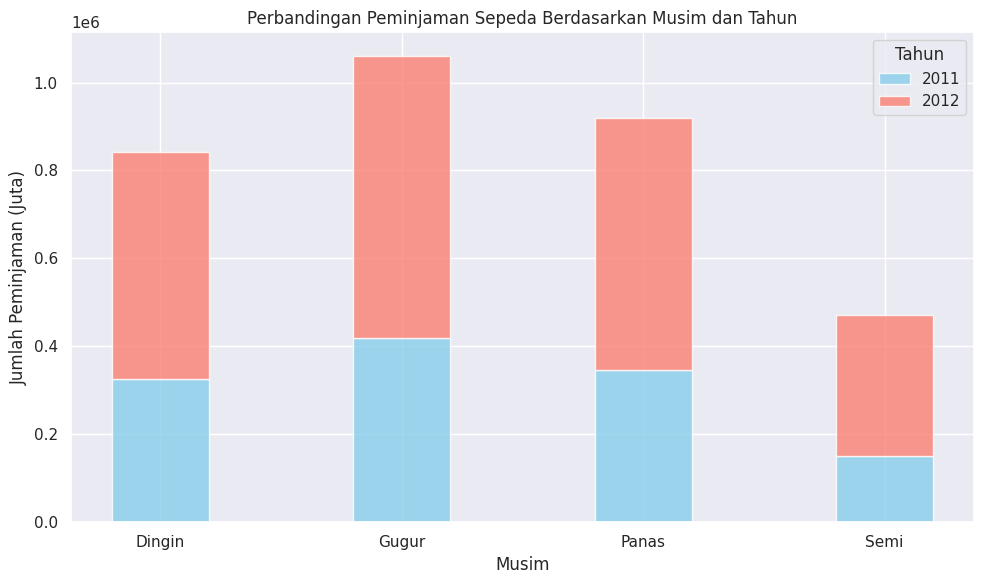

In [ ]:
df = df_time.copy()

# Mapping untuk variabel kategorik
df['season'] = df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'})
df['yr'] = df['yr'].map({0: '2011', 1: '2012'})

# Menghitung jumlah total peminjaman (cnt) untuk setiap kombinasi musim dan tahun
pivot_season_year = df.groupby(['season', 'yr'])['cnt'].sum().reset_index()
x = pivot_season_year['season'].unique()
y1 = pivot_season_year[pivot_season_year['yr'] == '2011']['cnt']
y2 = pivot_season_year[pivot_season_year['yr'] == '2012']['cnt']

# Membuat plot stacked barchart
plt.figure(figsize=(10, 6))
plt.bar(x, y1, color='skyblue', label='2011', width=0.4, alpha=0.8)
plt.bar(x, y2, bottom=y1, color='salmon', label='2012', width=0.4, alpha=0.8)

plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman (Juta)')
plt.title('Perbandingan Peminjaman Sepeda Berdasarkan Musim dan Tahun')
plt.legend(title='Tahun')

plt.tight_layout()
plt.show()

Deskripsi Kode :

1. Persiapan:
df = df_time.copy(): Menggandakan DataFrame df_time ke DataFrame baru df.

2. Mapping kategori:
df['season'] = df['season'].map({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'}): Mengubah nilai numerik pada kolom "season" menjadi nama musim.
df['yr'] = df['yr'].map({0: '2011', 1: '2012'}): Mengubah nilai numerik pada kolom "yr" menjadi tahun.

3. Menghitung total peminjaman:
pivot_season_year = df.groupby(['season', 'yr'])['cnt'].sum().reset_index(): Menghitung total peminjaman (cnt) untuk setiap kombinasi musim dan tahun.

4. Memisahkan data berdasarkan tahun:
x = pivot_season_year['season'].unique(): Menyimpan nama musim ke variabel x.
y1 = pivot_season_year[pivot_season_year['yr'] == '2011']['cnt']: Menyimpan total peminjaman di tahun 2011 ke variabel y1.
y2 = pivot_season_year[pivot_season_year['yr'] == '2012']['cnt']: Menyimpan total peminjaman di tahun 2012 ke variabel y2.

5. Membuat stacked barchart:
plt.bar(x, y1, color='skyblue', label='2011', width=0.4, alpha=0.8): Membuat bar chart untuk tahun 2011 dengan warna biru langit.
plt.bar(x, y2, bottom=y1, color='salmon', label='2012', width=0.4, alpha=0.8): Membuat bar chart untuk tahun 2012 di atas bar chart tahun 2011 dengan warna salmon.

6. Menambahkan elemen:
plt.xlabel('Musim'): Menambahkan label "Musim" pada sumbu X.
plt.ylabel('Jumlah Peminjaman (Juta)'): Menambahkan label "Jumlah Peminjaman (Juta)" pada sumbu Y.
plt.title('Perbandingan Peminjaman Sepeda Berdasarkan Musim dan Tahun'): Menambahkan judul "Perbandingan Peminjaman Sepeda Berdasarkan Musim dan Tahun".
plt.legend(title='Tahun'): Menambahkan legend dengan judul "Tahun".

7. Menampilkan plot:
plt.tight_layout(): Mengatur tata letak plot agar rapi.
plt.show(): Menampilkan plot stacked barchart.

### Pertanyaan 4 : Bagaimana perbandingan dari pengguna kasual dan pengguna yang terdaftar?

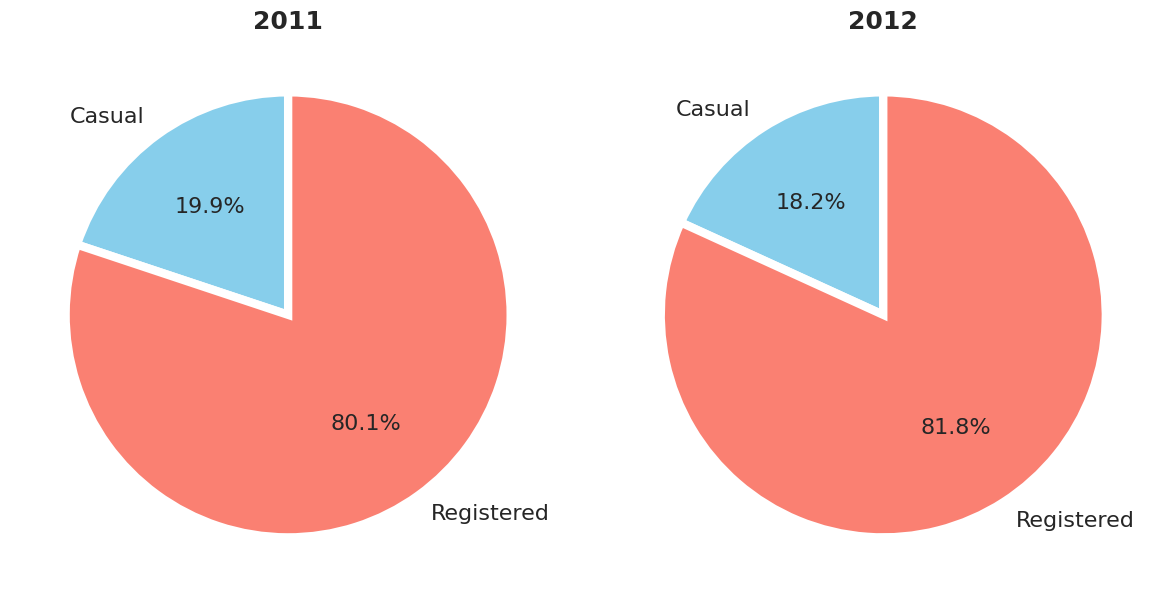

In [ ]:
df = df_time.copy()

# Mapping untuk variabel kategorik
df['yr'] = df['yr'].map({0: '2011', 1: '2012'})

# Menghitung rata-rata casual dan registered untuk setiap tahun
avg_data = df.groupby('yr').mean().reset_index()

# Menampilkan pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

labels_2011 = ['Casual', 'Registered']
sizes_2011 = avg_data.loc[avg_data['yr'] == '2011', ['casual', 'registered']].values.flatten()
axes[0].pie(sizes_2011, labels=labels_2011, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'],
           wedgeprops={'linewidth': 6, 'edgecolor': 'white'}, textprops={'fontsize': 16})
axes[0].set_title('2011', fontdict={'fontsize': 18, 'fontweight': 'bold'})

labels_2012 = ['Casual', 'Registered']
sizes_2012 = avg_data.loc[avg_data['yr'] == '2012', ['casual', 'registered']].values.flatten()
axes[1].pie(sizes_2012, labels=labels_2012, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'],
           wedgeprops={'linewidth': 6, 'edgecolor': 'white'}, textprops={'fontsize': 16})
axes[1].set_title('2012', fontdict={'fontsize': 18, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

Deskripsi Kode :

1. Membuat salinan DataFrame:
df = df_time.copy(): Membuat salinan dari DataFrame df_time untuk menghindari perubahan pada data asli.

2. Mapping tahun:
df['yr'] = df['yr'].map({0: '2011', 1: '2012'}): Mengubah nilai numerik pada kolom "yr" menjadi representasi tahun (2011 atau 2012).

3. Menghitung rerata:
avg_data = df.groupby('yr').mean().reset_index():
Mengelompokkan data berdasarkan tahun ("yr").
Menghitung nilai rata-rata untuk kolom "casual" dan "registered".
Mengubah hasil perhitungan menjadi DataFrame baru avg_data.

4. Membuat subplots:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)):
Menggunakan library matplotlib.pyplot untuk membuat plot.
Membuat 2 subplot (baris: 1, kolom: 2) dengan ukuran keseluruhan (12, 6) inci.
fig menyimpan referensi ke keseluruhan figure, dan axes menyimpan referensi ke masing-masing subplot.

5. Pie chart untuk 2011:
labels_2011 = ['Casual', 'Registered']: Mendefinisikan label untuk irisan pie chart.
sizes_2011 = avg_data.loc[avg_data['yr'] == '2011', ['casual', 'registered']].values.flatten():
Mengambil data dari DataFrame avg_data untuk tahun 2011 (yr == '2011').
Memilih kolom "casual" dan "registered".
Mengubah data menjadi format yang sesuai untuk pie chart (flatten()).
axes[0].pie(...):
Memvisualisasikan data menggunakan pie chart pada subplot pertama (axes[0]).
sizes_2011: Nilai untuk setiap irisan pie chart.
labels_2011: Label untuk setiap irisan pie chart.
autopct='%1.1f%%': Menampilkan persentase pada setiap irisan dengan format 1 desimal tempat di belakang koma.
startangle=90: Mulai menggambar pie chart dari sudut 90 derajat.
colors=['skyblue', 'salmon']: Menentukan warna untuk irisan pie chart

6. Pie chart untuk 2012:
labels_2012: Sama seperti pada tahun 2011, mendefinisikan label untuk irisan pie chart.
sizes_2012: Mengambil data dari DataFrame avg_data untuk tahun 2012 (yr == '2012').
axes[1].pie(...): Memvisualisasikan data menggunakan pie chart pada subplot kedua (axes[1]).

7. Menambahkan elemen:
axes[0].set_title('2011', fontdict={'fontsize': 18, 'fontweight': 'bold'}): Menambahkan judul "2011" pada subplot pertama dengan format font yang lebih besar dan tebal.
axes[1].set_title('2012', fontdict={'fontsize': 18, 'fontweight': 'bold'}): Menambahkan judul "2012" pada subplot kedua dengan format font yang lebih besar dan tebal.

8. Menampilkan plot:
plt.tight_layout(): Mengatur tata letak plot agar rapi.
plt.show(): Menampilkan plot pie chart.

### Pertanyaan 5 :  Bagaimana performa peminjaman sepeda tiap bulan?


Tahap ini memiliki 2 step, yaitu membuat cluster dan memvisualisasikannya. pada step pertama, akan dibuat pengelompokkan banyaknya hari peminjaman berdasarkan bulan menjadi 3 bagian, yaitu sedikit, sedang, dan banyak. Metode clustering sederhana ini dilakukan secara manual dan tidak menggunakan library scikit-learn (machine learning). Cluster akan dibuat dengan pembagian jumlah peminjaman menjadi 3 bagian yang sama rata berdasarkan nilai maksimum dan minimum dari variabel cnt.

In [ ]:
df = df_time.copy()

# Mapping untuk variabel kategorik
month_map = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
             7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
df['mnth'] = pd.Categorical(df['mnth'].map(month_map), categories=month_map.values(), ordered=True)

# Mendapatkan nilai minimum dan maksimum dan membagi data menjadi 3 bagian
min_total = df['cnt'].min()
max_total = df['cnt'].max()
bins = [min_total, min_total + (max_total - min_total) / 3, min_total + 2 * (max_total - min_total) / 3, max_total]

labels = ['Sedikit', 'Sedang', 'Banyak']
df['cluster'] = pd.cut(df['cnt'], bins=bins, labels=labels)

# Menghitung frekuensi masing-masing kombinasi mnth (bulan) dan cluster
result = df.groupby(['mnth', 'cluster']).size().unstack(fill_value=0)

print(result)

cluster    Sedikit  Sedang  Banyak
mnth                              
Januari         43      19       0
Februari        34      23       0
Maret           29      21      12
April           12      29      19
Mei              2      37      23
Juni             0      35      25
Juli             0      34      28
Agustus          1      33      28
September        4      28      28
Oktober          8      30      23
November        10      44       6
Desember        23      37       2


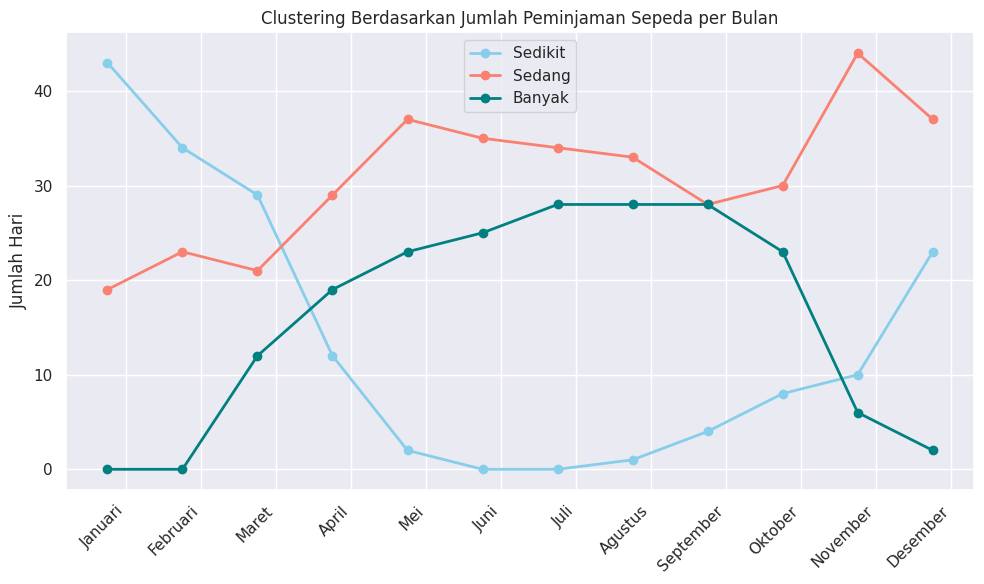

In [ ]:
# Data untuk plotting
months = result.index
sedikit = result['Sedikit']
sedang = result['Sedang']
banyak = result['Banyak']

# Plotting garis untuk masing-masing cluster
plt.figure(figsize=(10, 6))
rng = range(len(months))
plt.plot(rng, sedikit, marker='o', color='skyblue', label='Sedikit', linewidth=2)
plt.plot(rng, sedang, marker='o', color='salmon', label='Sedang', linewidth=2)
plt.plot(rng, banyak, marker='o', color='teal', label='Banyak', linewidth=2)

# Menampilkan plot
plt.xlabel('')
plt.ylabel('Jumlah Hari')
plt.title('Clustering Berdasarkan Jumlah Peminjaman Sepeda per Bulan')
bar_width = 0.25
plt.xticks([r + bar_width for r in range(len(months))], months, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Bagaimana variabel seperti temp dan atemp serta humidity dapat mempengaruhi jumlah total pengguna sepeda ?
Dari 3 visualisasi yang ditampilkan, dapat disimpulkan bahwa temp dan atemp memiliki korelasi positif dengan count, sehingga jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Terbalik dengan Humidity yang memiliki korelasi negatif dengan count walaupun sangat minim (tidak terlalu signifikan), tetapi tetap dapat menurunkan jumlah pengguna sepeda ketika humiditynya meningkat.



- Conclution pertanyaan 2 : Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?
Kondisi yang tampak pada visualisasi ini terbagi menjadi tiga bagian. Untuk jumlah pengguna sepeda berdasarkan workingday, workingday lah yang mengungguli non-workingday walaupun hasilnya memang tidak terlalu signifikan, tetapi tetap ada perbedaan yang jelas walaupun keduanya sama-sama diatas 4000 jumlah pengguna. Lanjut berdasarkan holiday (hari libur), disini non-holidaylah yang menang dengan perbedaan yang cukup signifikan daripada yang holiday. Hal ini mungkin pengguna lebih menyukai sewa sepeda saat hari-hari biasa saja. Terakhir berdasarkan weekday, berdasarkan data diatas, Hari Jumat (Fri) lah yang menempati urutan pertama dengan mean 4690.288462 dan di urutan terakhir ditempati oleh Minggu (Sun): 4228.828571.


- Conclution pertanyaan 3 :  Bagaimana musim memengaruhi jumlah peminjaman sepeda?
Berdasarkan analisis stacked barchart jumlah peminjaman sepeda berdasarkan musim tiap tahunnya, terlihat bahwa musim gugur menjadi musim yang paling banyak diminati oleh para peminjam, dengan jumlah peminjaman melebihi 1 juta selama periode 2011-2012. Hal ini berbanding terbalik dengan musim semi yang hanya mencapai sekitar 500 ribu peminjaman selama 2 tahun tersebut. Sementara itu, peminjaman pada musim dingin dan panas berada dalam kisaran 800-900 ribu. Selain itu, terlihat bahwa jumlah peminjaman pada tahun 2012 secara keseluruhan lebih tinggi dibandingkan dengan tahun 2011 untuk semua musim. Dapat disimpulkan bahwa musim memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda, dan pemahaman terhadap pola ini dapat menjadi dasar strategi peningkatan layanan dan promosi pada musim-musim tertentu.

- Conclution pertanyaan 4 : Bagaimana perbandingan dari pengguna kasual dan pengguna yang terdaftar?
Berdasarkan analisis perbandingan antara pengguna kasual dan pengguna terdaftar dalam peminjaman sepeda, terlihat bahwa pengguna terdaftar mendominasi jumlah peminjaman hingga mencapai sekitar 80% dari total peminjaman pada kedua tahun, 2011 dan 2012. Meskipun terdapat fluktuasi kecil dalam persentase pengguna kasual, proporsi pengguna terdaftar tetap mendominasi secara konsisten. Hal ini mengindikasikan bahwa layanan peminjaman sepeda lebih banyak dimanfaatkan oleh pengguna terdaftar, yang mungkin memiliki langganan atau keanggotaan tetap. Dalam hal ini, strategi promosi dan peningkatan layanan lebih baik ditujukan untuk mempertahankan dan meningkatkan kepuasan pengguna terdaftar guna memanfaatkan potensi pasar yang besar dari segmen ini.


- Conclution pertanyaan 5 : Bagaimana performa peminjaman sepeda tiap bulan?
Berdasarkan analisis performa peminjaman sepeda tiap bulan yang telah dikategorikan ke dalam cluster "Sedikit", "Sedang", dan "Banyak", terlihat bahwa tiap bulan memiliki pola yang berbeda dalam jumlah peminjaman. Bulan-bulan seperti Juni, Juli, dan Agustus cenderung memiliki jumlah peminjaman yang tinggi, masuk dalam cluster "Banyak", sementara bulan Januari, Februari, dan Maret cenderung memiliki jumlah peminjaman yang lebih rendah, masuk dalam cluster "Sedikit". Peningkatan jumlah peminjaman terlihat pada bulan-bulan yang lebih hangat seperti Mei hingga Agustus, sedangkan penurunan terjadi pada bulan-bulan yang cenderung lebih dingin. Dalam hal ini, informasi ini dapat membantu dalam perencanaan layanan dan inventarisasi sepeda untuk mengakomodasi permintaan yang fluktuatif setiap bulannya.
